# Ujian Arrythmia Manajemen Big data

menggunakan dataset: arrythmia

## Tahapan 1: menentukan obyektifitas bisnis
yang perlu dilakukan adalah memahami data


### meload Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### meload library

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import confusion_matrix

In [ ]:
pd.set_option('display.max_columns', None)

### meload data

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/processed_cleveland.csv', sep=',')

In [ ]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [ ]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


**catatan**: karena dari dataset tidak ada nama fitur, maka fitur kita namai sendiri

In [ ]:
dataset.columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","QRST","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","Label"]

In [ ]:
dataset.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,T,P,QRST,J,Heart_Rate,Q_Wave,R_Wave,S_Wave,R'_Wave,S'_Wave,Int_Def,Rag_R_Nom,Diph_R_Nom,Rag_P_Nom,Diph_P_Nom,Rag_T_Nom,Diph_T_Nom,DII00,DII01,DII02,DII03,DII04,DII05,DII06,DII07,DII08,DII09,DII10,DII11,DIII00,DIII01,DIII02,DIII03,DIII04,DIII05,DIII06,DIII07,DIII08,DIII09,DIII10,DIII11,AVR00,AVR01,AVR02,AVR03,AVR04,AVR05,AVR06,AVR07,AVR08,AVR09,AVR10,AVR11,AVL00,AVL01,AVL02,AVL03,AVL04,AVL05,AVL06,AVL07,AVL08,AVL09,AVL10,AVL11,AVF00,AVF01,AVF02,AVF03,AVF04,AVF05,AVF06,AVF07,AVF08,AVF09,AVF10,AVF11,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V400,V401,V402,V403,V404,V405,V406,V407,V408,V409,V410,V411,V500,V501,V502,V503,V504,V505,V506,V507,V508,V509,V510,V511,V600,V601,V602,V603,V604,V605,V606,V607,V608,V609,V610,V611,JJ_Wave,Amp_Q_Wave,Amp_R_Wave,Amp_S_Wave,R_Prime_Wave,S_Prime_Wave,P_Wave,T_Wave,QRSA,QRSTA,DII170,DII171,DII172,DII173,DII174,DII175,DII176,DII177,DII178,DII179,DIII180,DIII181,DIII182,DIII183,DIII184,DIII185,DIII186,DIII187,DIII188,DIII189,AVR190,AVR191,AVR192,AVR193,AVR194,AVR195,AVR196,AVR197,AVR198,AVR199,AVL200,AVL201,AVL202,AVL203,AVL204,AVL205,AVL206,AVL207,AVL208,AVL209,AVF210,AVF211,AVF212,AVF213,AVF214,AVF215,AVF216,AVF217,AVF218,AVF219,V1220,V1221,V1222,V1223,V1224,V1225,V1226,V1227,V1228,V1229,V2230,V2231,V2232,V2233,V2234,V2235,V2236,V2237,V2238,V2239,V3240,V3241,V3242,V3243,V3244,V3245,V3246,V3247,V3248,V3249,V4250,V4251,V4252,V4253,V4254,V4255,V4256,V4257,V4258,V4259,V5260,V5261,V5262,V5263,V5264,V5265,V5266,V5267,V5268,V5269,V6270,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,Label
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0.0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,0,0,0,40,0,0,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0,0,44,20,0,0,24,0,0,0,0,0,0,0,60,0,0,0,20,0,0,0,0,0,0,0,24,52,0,0,16,0,0,0,0,0,0,0,32,52,0,0,20,0,0,0,0,0,0,0,44,48,0,0,32,0,0,0,0,0,0,0,48,44,0,0,32,0,0,0,0,0,0,0,48,40,0,0,28,0,0,0,0,0,0,0,48,0,0,0,28,0,0,0,0,0,0,-0.6,0.0,7.2,0.0,0.0,0.0,0.4,1.5,17.2,26.5,0.0,0.0,5.5,0.0,0.0,0.0,0.1,1.7,17.6,29.5,0.3,-1.6,0.9,0.0,0.0,0.0,-0.3,0.4,-1.5,1.3,0.1,-6.4,0.0,0.0,0.0,0.0,-0.3,-1.6,-15.3,-25.5,-0.3,0.0,4.2,-0.9,0.0,0.0,0.4,0.7,8.3,12.3,0.2,0.0,2.2,0.0,0.0,0.0,-0.2,0.8,6.6,11.7,0.4,0.0,1.0,-8.8,0.0,0.0,0.5,-0.6,-21.6,-26.8,0.4,0.0,2.6,-7.9,0.0,0.0,0.8,2.0,-16.4,1.2,0.0,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,116,0,0,0,52,0,0,0,0,0,0,52,64,0,0,0,88,0,0,0,0,0,0,0,36,92,0,0,24,0,0,0,0,0,0,0,128,0,0,0,24,0,1,0,0,0,0,0,24,36,76,0,100,0,0,0,0,0,0,0,40,28,60,0,96,0,0,0,0,0,0,0,48,20,56,24,32,0,0,0,0,0,0,0,44,88,0,0,28,0,0,0,0,0,0,0,44,76,0,0,28,0,0,0,0,0,0,0,44,72,0,0,24,0,0,0,0,0,0,1.0,0.0,4.5,-2.8,0.0,0.0,0.3,2.5,-2.2,19.8,0.8,-0.4,6.4,-1.3,0.0,0.0,0

## Tahapan 3: Menelaah Data

### type data

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

### melihat ukuran dataset

In [ ]:
dataset.shape

(452, 280)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, Age to Label
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


**catatan**: data nya aneh, harusnya int64 semua, tapi ada yang bertipe object, ternyata ada tanda ?. dari sini saya simpulkan bahwa tanda tanya adalah penanda data tersebut tidak ada isinya (missing values)

### cek jumlah class

In [ ]:
dataset['Label'].unique()

array([ 8,  6, 10,  1,  7, 14,  3, 16,  2,  4,  5,  9, 15])

In [ ]:
dataset['Label'].value_counts()

1     245
10     50
2      44
6      25
16     22
3      15
4      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: Label, dtype: int64

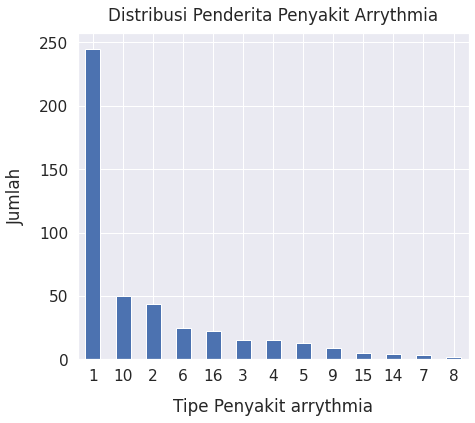

In [ ]:
sns.set(font_scale=1.4)
dataset['Label'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Tipe Penyakit arrythmia", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Penderita Penyakit Arrythmia", y=1.02);

### deskripsi dataset

In [ ]:
dataset.describe()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,Q_Wave,R_Wave,S_Wave,R'_Wave,S'_Wave,Int_Def,Rag_R_Nom,Diph_R_Nom,Rag_P_Nom,Diph_P_Nom,Rag_T_Nom,Diph_T_Nom,DII00,DII01,DII02,DII03,DII04,DII05,DII06,DII07,DII08,DII09,DII10,DII11,DIII00,DIII01,DIII02,DIII03,DIII04,DIII05,DIII06,DIII07,DIII08,DIII09,DIII10,DIII11,AVR00,AVR01,AVR02,AVR03,AVR04,AVR05,AVR06,AVR07,AVR08,AVR09,AVR10,AVR11,AVL00,AVL01,AVL02,AVL03,AVL04,AVL05,AVL06,AVL07,AVL08,AVL09,AVL10,AVL11,AVF00,AVF01,AVF02,AVF03,AVF04,AVF05,AVF06,AVF07,AVF08,AVF09,AVF10,AVF11,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V400,V401,V402,V403,V404,V405,V406,V407,V408,V409,V410,V411,V500,V501,V502,V503,V504,V505,V506,V507,V508,V509,V510,V511,V600,V601,V602,V603,V604,V605,V606,V607,V608,V609,V610,V611,JJ_Wave,Amp_Q_Wave,Amp_R_Wave,Amp_S_Wave,R_Prime_Wave,S_Prime_Wave,P_Wave,T_Wave,QRSA,QRSTA,DII170,DII171,DII172,DII173,DII174,DII175,DII176,DII177,DII178,DII179,DIII180,DIII181,DIII182,DIII183,DIII184,DIII185,DIII186,DIII187,DIII188,DIII189,AVR190,AVR191,AVR192,AVR193,AVR194,AVR195,AVR196,AVR197,AVR198,AVR199,AVL200,AVL201,AVL202,AVL203,AVL204,AVL205,AVL206,AVL207,AVL208,AVL209,AVF210,AVF211,AVF212,AVF213,AVF214,AVF215,AVF216,AVF217,AVF218,AVF219,V1220,V1221,V1222,V1223,V1224,V1225,V1226,V1227,V1228,V1229,V2230,V2231,V2232,V2233,V2234,V2235,V2236,V2237,V2238,V2239,V3240,V3241,V3242,V3243,V3244,V3245,V3246,V3247,V3248,V3249,V4250,V4251,V4252,V4253,V4254,V4255,V4256,V4257,V4258,V4259,V5260,V5261,V5262,V5263,V5264,V5265,V5266,V5267,V5268,V5269,V6270,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,Label
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.00000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.0,452.000000,452.0,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.0,452.0,452.000000,452.00000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000

# Tahapan 4: Memvalidasi Data

## memperbaiki nilai yang hilang

nilai yang hilang, ditulis dalam bentuk ?, maka kita rubah menjadi NaN

In [ ]:
dataset.replace("?", np.nan, inplace= True)

In [ ]:
dataset.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,T,P,QRST,J,Heart_Rate,Q_Wave,R_Wave,S_Wave,R'_Wave,S'_Wave,Int_Def,Rag_R_Nom,Diph_R_Nom,Rag_P_Nom,Diph_P_Nom,Rag_T_Nom,Diph_T_Nom,DII00,DII01,DII02,DII03,DII04,DII05,DII06,DII07,DII08,DII09,DII10,DII11,DIII00,DIII01,DIII02,DIII03,DIII04,DIII05,DIII06,DIII07,DIII08,DIII09,DIII10,DIII11,AVR00,AVR01,AVR02,AVR03,AVR04,AVR05,AVR06,AVR07,AVR08,AVR09,AVR10,AVR11,AVL00,AVL01,AVL02,AVL03,AVL04,AVL05,AVL06,AVL07,AVL08,AVL09,AVL10,AVL11,AVF00,AVF01,AVF02,AVF03,AVF04,AVF05,AVF06,AVF07,AVF08,AVF09,AVF10,AVF11,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V400,V401,V402,V403,V404,V405,V406,V407,V408,V409,V410,V411,V500,V501,V502,V503,V504,V505,V506,V507,V508,V509,V510,V511,V600,V601,V602,V603,V604,V605,V606,V607,V608,V609,V610,V611,JJ_Wave,Amp_Q_Wave,Amp_R_Wave,Amp_S_Wave,R_Prime_Wave,S_Prime_Wave,P_Wave,T_Wave,QRSA,QRSTA,DII170,DII171,DII172,DII173,DII174,DII175,DII176,DII177,DII178,DII179,DIII180,DIII181,DIII182,DIII183,DIII184,DIII185,DIII186,DIII187,DIII188,DIII189,AVR190,AVR191,AVR192,AVR193,AVR194,AVR195,AVR196,AVR197,AVR198,AVR199,AVL200,AVL201,AVL202,AVL203,AVL204,AVL205,AVL206,AVL207,AVL208,AVL209,AVF210,AVF211,AVF212,AVF213,AVF214,AVF215,AVF216,AVF217,AVF218,AVF219,V1220,V1221,V1222,V1223,V1224,V1225,V1226,V1227,V1228,V1229,V2230,V2231,V2232,V2233,V2234,V2235,V2236,V2237,V2238,V2239,V3240,V3241,V3242,V3243,V3244,V3245,V3246,V3247,V3248,V3249,V4250,V4251,V4252,V4253,V4254,V4255,V4256,V4257,V4258,V4259,V5260,V5261,V5262,V5263,V5264,V5265,V5266,V5267,V5268,V5269,V6270,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,Label
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,NaN,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0.0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,NaN,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,0,0,0,40,0,0,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0,0,44,20,0,0,24,0,0,0,0,0,0,0,60,0,0,0,20,0,0,0,0,0,0,0,24,52,0,0,16,0,0,0,0,0,0,0,32,52,0,0,20,0,0,0,0,0,0,0,44,48,0,0,32,0,0,0,0,0,0,0,48,44,0,0,32,0,0,0,0,0,0,0,48,40,0,0,28,0,0,0,0,0,0,0,48,0,0,0,28,0,0,0,0,0,0,-0.6,0.0,7.2,0.0,0.0,0.0,0.4,1.5,17.2,26.5,0.0,0.0,5.5,0.0,0.0,0.0,0.1,1.7,17.6,29.5,0.3,-1.6,0.9,0.0,0.0,0.0,-0.3,0.4,-1.5,1.3,0.1,-6.4,0.0,0.0,0.0,0.0,-0.3,-1.6,-15.3,-25.5,-0.3,0.0,4.2,-0.9,0.0,0.0,0.4,0.7,8.3,12.3,0.2,0.0,2.2,0.0,0.0,0.0,-0.2,0.8,6.6,11.7,0.4,0.0,1.0,-8.8,0.0,0.0,0.5,-0.6,-21.6,-26.8,0.4,0.0,2.6,-7.9,0.0,0.0,0.8,2.0,-16.4,1.2,0.0,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,116,0,0,0,52,0,0,0,0,0,0,52,64,0,0,0,88,0,0,0,0,0,0,0,36,92,0,0,24,0,0,0,0,0,0,0,128,0,0,0,24,0,1,0,0,0,0,0,24,36,76,0,100,0,0,0,0,0,0,0,40,28,60,0,96,0,0,0,0,0,0,0,48,20,56,24,32,0,0,0,0,0,0,0,44,88,0,0,28,0,0,0,0,0,0,0,44,76,0,0,28,0,0,0,0,0,0,0,44,72,0,0,24,0,0,0,0,0,0,1.0,0.0,4.5,-2.8,0.0,0.0,0.3,2.5,-2.2,19.8,0.8,-0.4,6.4,-1.3,0.0,0

sekarang kita perbaiki data yang hilang

In [ ]:
dataset.isnull().values.any()

True

In [ ]:
dataset.loc[:, dataset.isnull().any()].columns

Index(['T', 'P', 'QRST', 'J', 'Heart_Rate'], dtype='object')

In [ ]:
dataset.loc[:,list(dataset.loc[:,dataset.isnull().any()].columns)].isnull().sum()/(len(dataset))*100

T              1.769912
P              4.867257
QRST           0.221239
J             83.185841
Heart_Rate     0.221239
dtype: float64

catatan: 
- karena nilai yang hilang, tidak banyak, maka kita bisa menggunakan **replace missing values**

- jika data yang hilang diatas 50%, maka kita **remove missing values**

# Tahapan 6: Membersihkan data
- perbaiki data yang hilang
- hapus data duplikat
- cek fitur konstant

### memperbaiki data yang hilang

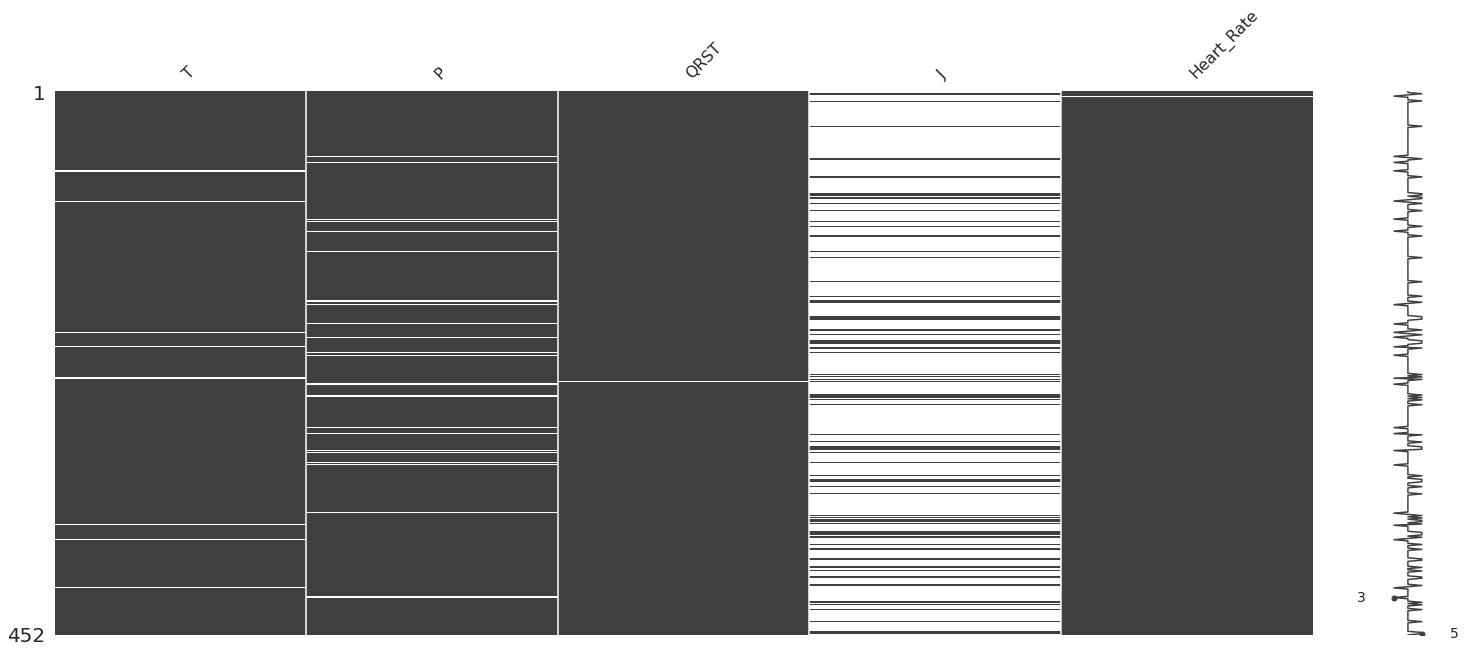

In [ ]:
missingdata_df = dataset.columns[dataset.isnull().any()].tolist()
missingno.matrix(dataset[missingdata_df])

In [ ]:
# hapus J karena hilang lebih dari 50%
dataset.drop(['J'], axis="columns", inplace=True)

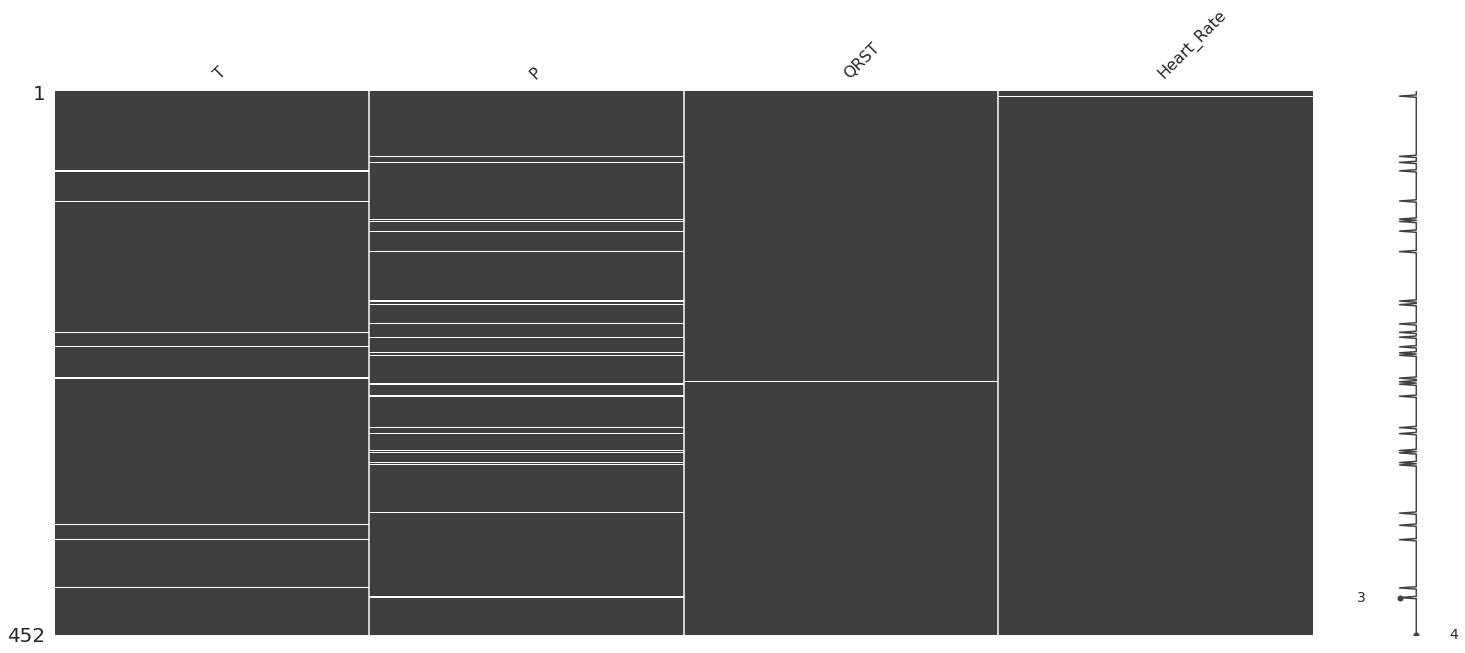

In [ ]:
missingdata_df = dataset.columns[dataset.isnull().any()].tolist()
missingno.matrix(dataset[missingdata_df])

In [ ]:
median_value=dataset['T'].median()
dataset['T']=dataset['T'].fillna(median_value)

In [ ]:
median_value

41.0

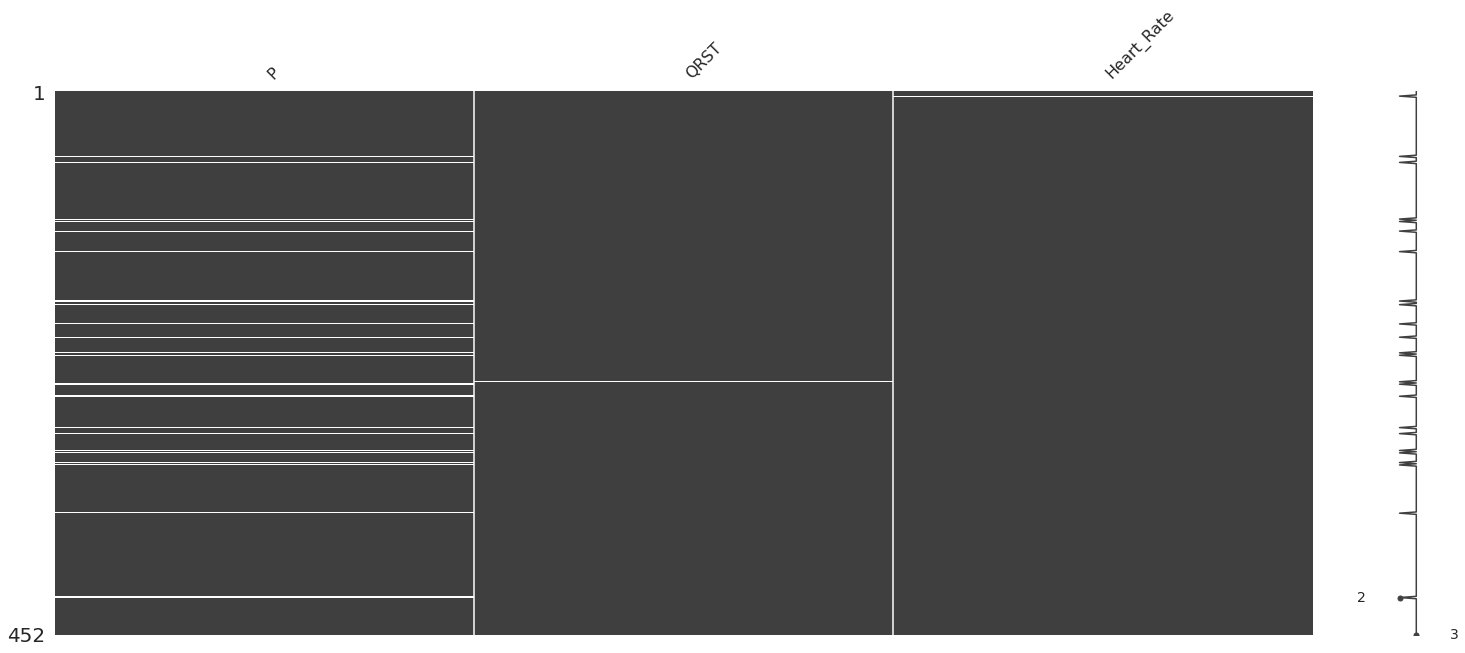

In [ ]:
missingdata_df = dataset.columns[dataset.isnull().any()].tolist()
missingno.matrix(dataset[missingdata_df])

In [ ]:
median_value=dataset['P'].median()
dataset['P']=dataset['P'].fillna(median_value)

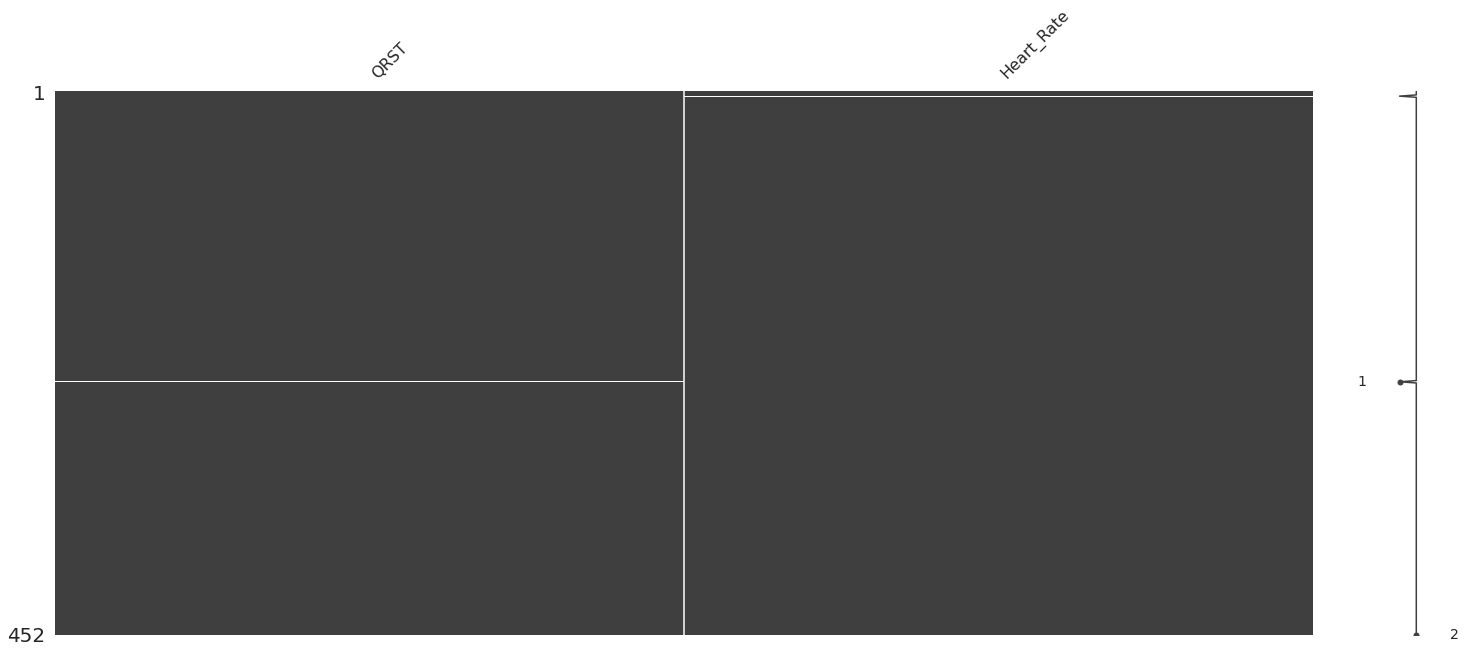

In [ ]:
missingdata_df = dataset.columns[dataset.isnull().any()].tolist()
missingno.matrix(dataset[missingdata_df])

In [ ]:
median_value=dataset['QRST'].median()
dataset['QRST']=dataset['QRST'].fillna(median_value)

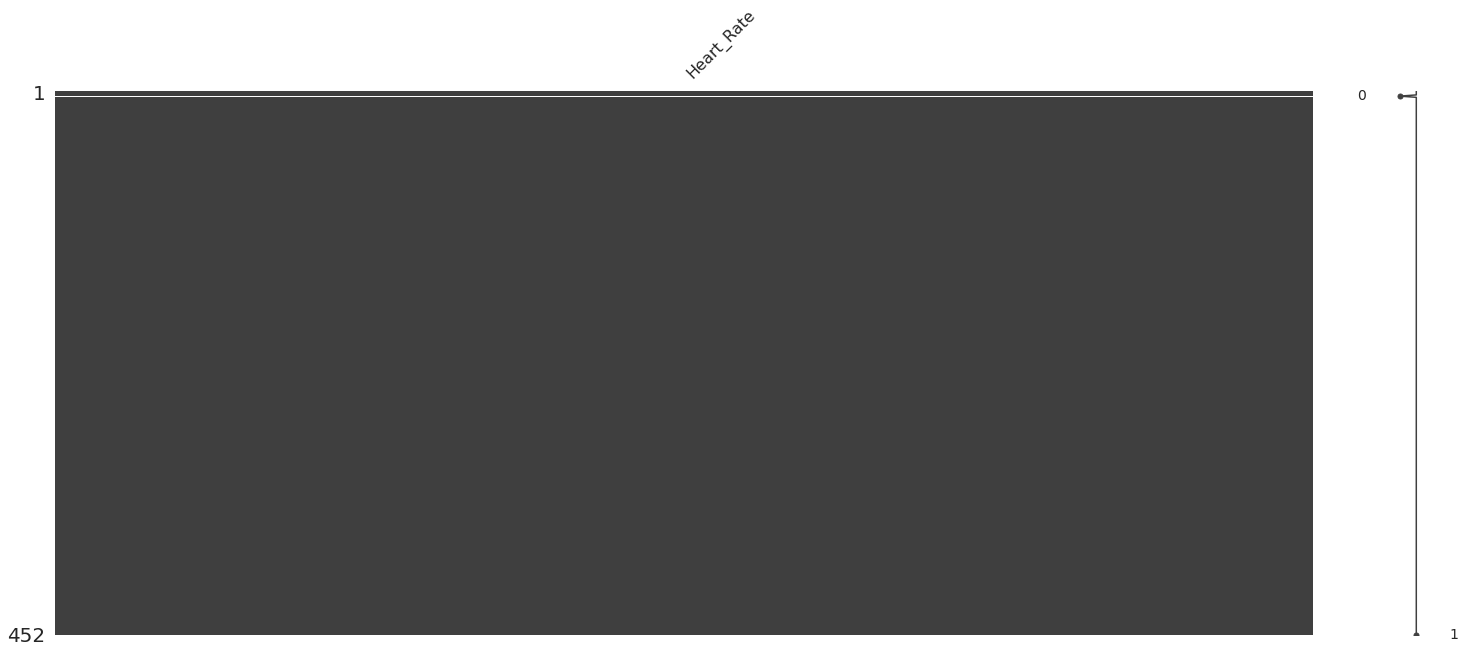

In [ ]:
missingdata_df = dataset.columns[dataset.isnull().any()].tolist()
missingno.matrix(dataset[missingdata_df])

In [ ]:
median_value=dataset['Heart_Rate'].median()
dataset['Heart_Rate']=dataset['Heart_Rate'].fillna(median_value)

### menghapus data duplikat

In [ ]:
dataset.shape

(452, 279)

In [ ]:
dataset.drop_duplicates()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,T,P,QRST,Heart_Rate,Q_Wave,R_Wave,S_Wave,R'_Wave,S'_Wave,Int_Def,Rag_R_Nom,Diph_R_Nom,Rag_P_Nom,Diph_P_Nom,Rag_T_Nom,Diph_T_Nom,DII00,DII01,DII02,DII03,DII04,DII05,DII06,DII07,DII08,DII09,DII10,DII11,DIII00,DIII01,DIII02,DIII03,DIII04,DIII05,DIII06,DIII07,DIII08,DIII09,DIII10,DIII11,AVR00,AVR01,AVR02,AVR03,AVR04,AVR05,AVR06,AVR07,AVR08,AVR09,AVR10,AVR11,AVL00,AVL01,AVL02,AVL03,AVL04,AVL05,AVL06,AVL07,AVL08,AVL09,AVL10,AVL11,AVF00,AVF01,AVF02,AVF03,AVF04,AVF05,AVF06,AVF07,AVF08,AVF09,AVF10,AVF11,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V400,V401,V402,V403,V404,V405,V406,V407,V408,V409,V410,V411,V500,V501,V502,V503,V504,V505,V506,V507,V508,V509,V510,V511,V600,V601,V602,V603,V604,V605,V606,V607,V608,V609,V610,V611,JJ_Wave,Amp_Q_Wave,Amp_R_Wave,Amp_S_Wave,R_Prime_Wave,S_Prime_Wave,P_Wave,T_Wave,QRSA,QRSTA,DII170,DII171,DII172,DII173,DII174,DII175,DII176,DII177,DII178,DII179,DIII180,DIII181,DIII182,DIII183,DIII184,DIII185,DIII186,DIII187,DIII188,DIII189,AVR190,AVR191,AVR192,AVR193,AVR194,AVR195,AVR196,AVR197,AVR198,AVR199,AVL200,AVL201,AVL202,AVL203,AVL204,AVL205,AVL206,AVL207,AVL208,AVL209,AVF210,AVF211,AVF212,AVF213,AVF214,AVF215,AVF216,AVF217,AVF218,AVF219,V1220,V1221,V1222,V1223,V1224,V1225,V1226,V1227,V1228,V1229,V2230,V2231,V2232,V2233,V2234,V2235,V2236,V2237,V2238,V2239,V3240,V3241,V3242,V3243,V3244,V3245,V3246,V3247,V3248,V3249,V4250,V4251,V4252,V4253,V4254,V4255,V4256,V4257,V4258,V4259,V5260,V5261,V5262,V5263,V5264,V5265,V5266,V5267,V5268,V5269,V6270,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,Label
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0.0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,0,0,0,40,0,0,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0,0,44,20,0,0,24,0,0,0,0,0,0,0,60,0,0,0,20,0,0,0,0,0,0,0,24,52,0,0,16,0,0,0,0,0,0,0,32,52,0,0,20,0,0,0,0,0,0,0,44,48,0,0,32,0,0,0,0,0,0,0,48,44,0,0,32,0,0,0,0,0,0,0,48,40,0,0,28,0,0,0,0,0,0,0,48,0,0,0,28,0,0,0,0,0,0,-0.6,0.0,7.2,0.0,0.0,0.0,0.4,1.5,17.2,26.5,0.0,0.0,5.5,0.0,0.0,0.0,0.1,1.7,17.6,29.5,0.3,-1.6,0.9,0.0,0.0,0.0,-0.3,0.4,-1.5,1.3,0.1,-6.4,0.0,0.0,0.0,0.0,-0.3,-1.6,-15.3,-25.5,-0.3,0.0,4.2,-0.9,0.0,0.0,0.4,0.7,8.3,12.3,0.2,0.0,2.2,0.0,0.0,0.0,-0.2,0.8,6.6,11.7,0.4,0.0,1.0,-8.8,0.0,0.0,0.5,-0.6,-21.6,-26.8,0.4,0.0,2.6,-7.9,0.0,0.0,0.8,2.0,-16.4,1.2,0.0,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,116,0,0,0,52,0,0,0,0,0,0,52,64,0,0,0,88,0,0,0,0,0,0,0,36,92,0,0,24,0,0,0,0,0,0,0,128,0,0,0,24,0,1,0,0,0,0,0,24,36,76,0,100,0,0,0,0,0,0,0,40,28,60,0,96,0,0,0,0,0,0,0,48,20,56,24,32,0,0,0,0,0,0,0,44,88,0,0,28,0,0,0,0,0,0,0,44,76,0,0,28,0,0,0,0,0,0,0,44,72,0,0,24,0,0,0,0,0,0,1.0,0.0,4.5,-2.8,0.0,0.0,0.3,2.5,-2.2,19.8,0.8,-0.4,6.4,-1.3,0.0,0.0,0.7,2.7,14

In [ ]:
dataset.shape

(452, 279)

### hapus fitur(kolom) yang bernilai konstan

In [ ]:
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]

In [ ]:
dataset.shape

(452, 262)

# Tahapan 7: Mengkonstruksi data

transformasi data bisa berupa:
- menjadi PCA

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 262 entries, Age to Label
dtypes: float64(116), int64(142), object(4)
memory usage: 925.3+ KB


### lakukan pembagian dataset menjadi training dan testing

In [ ]:
y = dataset['Label']

In [ ]:
y

0       8
1       6
2      10
3       1
4       7
       ..
447     1
448    10
449     2
450     1
451     1
Name: Label, Length: 452, dtype: int64

In [ ]:
X = dataset.drop(['Label'], 1)

<ipython-input-48-2425bca9f1f2>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = dataset.drop(['Label'], 1)


In [ ]:
X

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,T,P,QRST,Heart_Rate,Q_Wave,R_Wave,S_Wave,R'_Wave,Int_Def,Rag_R_Nom,Diph_R_Nom,Rag_P_Nom,Diph_P_Nom,Rag_T_Nom,Diph_T_Nom,DII00,DII01,DII02,DII03,DII04,DII05,DII06,DII07,DII08,DII09,DII10,DII11,DIII00,DIII01,DIII02,DIII03,DIII04,DIII05,DIII06,DIII07,DIII08,DIII09,DIII10,DIII11,AVR00,AVR01,AVR02,AVR03,AVR04,AVR05,AVR06,AVR07,AVR08,AVR09,AVR10,AVR11,AVL00,AVL01,AVL02,AVL03,AVL05,AVL07,AVL08,AVL09,AVL10,AVL11,AVF00,AVF01,AVF02,AVF03,AVF04,AVF05,AVF06,AVF07,AVF09,AVF10,AVF11,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V400,V401,V402,V403,V404,V405,V406,V407,V410,V411,V500,V501,V502,V503,V505,V507,V509,V511,V600,V601,V602,V603,V605,V606,V607,V608,V611,JJ_Wave,Amp_Q_Wave,Amp_R_Wave,Amp_S_Wave,R_Prime_Wave,P_Wave,T_Wave,QRSA,QRSTA,DII170,DII171,DII172,DII173,DII174,DII175,DII176,DII177,DII178,DII179,DIII180,DIII181,DIII182,DIII183,DIII184,DIII185,DIII186,DIII187,DIII188,DIII189,AVR190,AVR191,AVR192,AVR193,AVR194,AVR195,AVR196,AVR197,AVR198,AVR199,AVL200,AVL201,AVL202,AVL203,AVL204,AVL206,AVL207,AVL208,AVL209,AVF210,AVF211,AVF212,AVF213,AVF214,AVF215,AVF216,AVF217,AVF218,AVF219,V1220,V1221,V1222,V1223,V1224,V1225,V1226,V1227,V1228,V1229,V2230,V2231,V2232,V2233,V2234,V2235,V2236,V2237,V2238,V2239,V3240,V3241,V3242,V3243,V3244,V3245,V3246,V3247,V3248,V3249,V4250,V4251,V4252,V4253,V4254,V4255,V4256,V4257,V4258,V4259,V5260,V5261,V5262,V5263,V5264,V5266,V5267,V5268,V5269,V6270,V6271,V6272,V6273,V6274,V6276,V6277,V6278,V6279
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,63,0,52,44,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,32,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,52,48,0,32,0,0,0,0,56,44,0,32,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.9,2.9,23.3,49.4
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,53,0,48,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,0,0,0,40,0,0,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0,0,44,20,0,24,0,0,0,0,0,0,60,0,0,0,20,0,0,0,0,0,0,24,52,0,0,16,0,0,0,0,0,0,0,32,52,0,0,20,0,0,0,0,0,0,0,44,48,0,0,32,0,0,0,0,0,0,0,48,44,0,0,32,0,0,0,0,0,48,40,0,28,0,0,0,0,48,0,0,28,0,0,0,0,-0.6,0.0,7.2,0.0,0.0,0.4,1.5,17.2,26.5,0.0,0.0,5.5,0.0,0.0,0.0,0.1,1.7,17.6,29.5,0.3,-1.6,0.9,0.0,0.0,0.0,-0.3,0.4,-1.5,1.3,0.1,-6.4,0.0,0.0,0.0,0.0,-0.3,-1.6,-15.3,-25.5,-0.3,0.0,4.2,-0.9,0.0,0.4,0.7,8.3,12.3,0.2,0.0,2.2,0.0,0.0,0.0,-0.2,0.8,6.6,11.7,0.4,0.0,1.0,-8.8,0.0,0.0,0.5,-0.6,-21.6,-26.8,0.4,0.0,2.6,-7.9,0.0,0.0,0.8,2.0,-16.4,1.2,0.0,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.2,2.1,20.4,38.8
2,54,0,172,95,138,163,386,185,102,96,34,70,66,75,0,40,80,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,116,0,0,0,52,0,0,0,0,0,0,52,64,0,0,0,88,0,0,0,0,0,0,0,36,92,0,24,0,0,0,0,0,0,128,0,0,0,24,0,1,0,0,0,0,24,36,76,0,100,0,0,0,0,0,0,0,40,28,60,0,96,0,0,0,0,0,0,0,48,20,56,24,32,0,0,0,0,0,0,0,44,88,0,0,28,0,0,0,0,0,44,76,0,28,0,0,0,0,44,72,0,24,0,0,0,0,1.0,0.0,4.5,-2.8,0.0,0.3,2.5,-2.2,19.8,0.8,-0.4,6.4,-1.3,0.0,0.0,0.7,2.7,14.2,37.9,-0.2,-0.6,4.4,0.0,0.0,0.0,0.5,0.2,24.7,26.2,-1.0,-5.3,1.8,0.0,0.0,0.0,-0.5,-2.5,-8.0,-28.5,0.5,0.0,1.7,-2.7,0.0,-0.2,1.0,-9.4,-1.2,0.4,0.0,4.9,0.0,0.0,0.0,0.6,1.4,31.3,42.7,-0.8,0.0,0.7,-3.8,6.5,0.0,0.3,-3.3,18.7,-13.6,

### dataset original

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=2022)

## - Mencoba Menggunakan Data Normalisasi

### data original diberi perlakuan normalisasi


In [ ]:
X_norm = StandardScaler().fit_transform(X)

In [ ]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X_norm,y, test_size=0.3, random_state=2022)

## - (new) Original PCA

In [ ]:
pca = PCA(random_state=2022)
pca.fit(X)
ori_pca_array = pca.transform(X)
ori_pca = pd.DataFrame(ori_pca_array)
print("Heads of lungs_pca:",ori_pca.head())
var_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:",var_ratio)
sv = pca.singular_values_
print("Singular Value:",sv)

Heads of lungs_pca:          0          1           2          3          4           5    \
0  35.412377 -43.115298   35.410923  18.797002  61.335547  -32.185397   
1  -8.915123 -12.986433   36.266365   4.407107  -8.812692  -42.100403   
2 -86.697445  41.339721 -101.194115  -6.033861  42.194405  127.340198   
3  10.609738 -52.143820   53.052347 -14.668022  72.714939   19.641262   
4  50.053098 -34.358977    2.239185  21.642330  41.728593  -21.220227   

         6          7          8          9           10         11   \
0  21.157832   7.962209 -37.511454  24.268919  -99.162874  23.965837   
1 -45.150524   1.307896  15.471868  10.476055  -14.880434 -64.646727   
2  -9.601922 -18.269599   8.771202  67.815684  -48.404375   8.845797   
3  59.184837 -11.072989  17.645769  40.254249  -35.530807 -31.440644   
4  40.111353  -4.758186 -29.188045  16.649379 -114.239600  12.152068   

         12         13         14         15         16         17   \
0  40.988043  -5.247264 -17.117403   

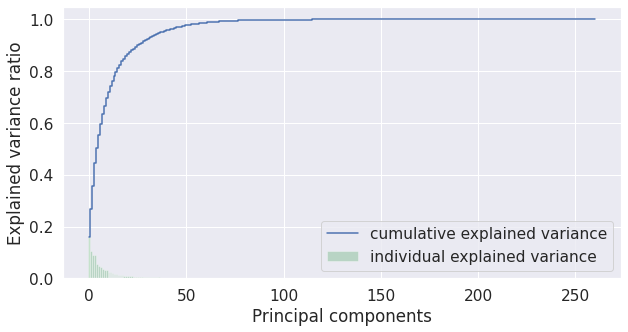

Cumulative explained ratio: [0.1600638  0.26659577 0.35784284 0.447193   0.50333204 0.55255188
 0.59679245 0.63294809 0.66451896 0.69477142 0.71876213 0.74119882
 0.76296037 0.7814929  0.79803009 0.81242889 0.82575732 0.83845264
 0.84822428 0.85750107 0.86570099 0.87341718 0.88063937 0.88740223
 0.8937573  0.8996497  0.90528318 0.91061411 0.91575897 0.92056196
 0.92504889 0.92937039 0.93340303 0.93717908 0.94069628 0.94395196
 0.94715289 0.9501857  0.95294659 0.95558276 0.95797528 0.96033099
 0.96263185 0.96487315 0.96696768 0.96904126 0.97086487 0.97255792
 0.97411006 0.97555895 0.97695408 0.97828385 0.97958798 0.98083329
 0.98197793 0.98306371 0.98413731 0.98516776 0.98613082 0.98704799
 0.98788784 0.98867374 0.98937512 0.99005855 0.9907038  0.99131042
 0.99189562 0.99241946 0.99289281 0.99331481 0.99371245 0.99410493
 0.99447942 0.99483289 0.99516259 0.99546677 0.99576592 0.99604249
 0.99630144 0.99654603 0.9967779  0.99700229 0.99720965 0.99741337
 0.99759685 0.99776691 0.99792766 

In [ ]:
cum_var_ratio = np.cumsum(var_ratio)

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_ratio)), 
        var_ratio, 
        alpha=0.3333, 
        align='center', 
        label='individual explained variance', 
        color = 'g')
plt.step(range(len(cum_var_ratio)),
         cum_var_ratio, 
         where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

print("Cumulative explained ratio:",cum_var_ratio)

yang mendekati 0.9 ada di point 27

In [ ]:
pca = PCA(n_components=27, random_state=2022)
pca.fit(X)
ori_pca_array = pca.transform(X)
ori_pca = pd.DataFrame(data=ori_pca_array, columns = 
                       ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
                        'PC11', 'PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
                        'PC21', 'PC22','PC23','PC24','PC25','PC26','PC27'
                        ])

In [ ]:
ori_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27
0,35.412377,-43.115298,35.410923,18.797002,61.335547,-32.185397,21.157832,7.962209,-37.511454,24.268919,-99.162874,23.965837,40.988043,-5.247264,-17.117403,3.717792,6.327535,-28.629696,-14.462187,-29.034837,14.923664,19.316611,-11.978626,-23.191750,-8.275566,-27.664096,-2.751560
1,-8.915123,-12.986433,36.266365,4.407107,-8.812692,-42.100403,-45.150524,1.307896,15.471868,10.476055,-14.880434,-64.646727,-10.209653,-16.816527,-24.699927,26.303549,14.277823,-20.068251,13.738688,20.524730,-18.912075,-6.361570,-23.258229,-4.515390,14.001032,-10.614817,15.710795
2,-86.697445,41.339721,-101.194115,-6.033861,42.194405,127.340198,-9.601922,-18.269599,8.771202,67.815684,-48.404375,8.845797,11.212364,29.038340,-55.116803,7.177027,-45.324684,38.383335,-33.875647,9.514324,-8.563474,-37.686271,0.655714,57.358440,-12.888296,-18.686778,-41.637741
3,10.609738,-52.143820,53.052347,-14.668022,72.714939,19.641262,59.184837,-11.072989,17.645769,40.254249,-35.530807,-31.440644,14.580579,41.578758,21.753871,30.728617,-26.240232,-11.720014,-31.878108,-18.265723,39.914653,7.866433,5.551238,1.998539,8.588056,-0.205883,-6.828520
4,50.053098,-34.358977,2.239185,21.642330,41.728593,-21.220227,40.111353,-4.758186,-29.188045,16.649379,-114.239600,12.152068,28.504877,-1.665670,6.265533,-2.640955,0.720527,-26.966148,-15.807801,-10.703480,20.271318,11.957753,3.564011,-8.628943,16.275048,-26.959817,-9.665800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,159.999960,14.123855,-14.445208,20.577333,51.498755,-27.793840,23.023936,-41.384220,20.472570,18.801618,-5.508579,-11.541547,18.655238,-12.269000,20.849717,-4.668039,-9.043380,-39.155334,-1.632176,-5.663803,-10.344433,13.463480,5.354260,6.051575,-5.207469,2.922849,11.713043
448,-172.121047,-77.285074,1.724447,-40.388263,-13.905313,40.331475,106.528114,19.786493,-49.475639,43.036783,-17.718973,4.341897,-12.272920,-36.017169,14.201339,-6.804634,-13.282097,-17.949567,46.244655,16.478733,22.225552,-27.538600,22.256192,8.025273,-8.859073,-19.531360,-14.460900
449,326.783461,79.147087,-137.384879,83.780201,68.474523,40.218933,-93.619076,21.934613,44.243899,57.558848,53.169289,-72.454136,-37.755608,66.128317,-60.984772,54.239526,-11.531669,-31.665413,27.649635,-19.054223,-9.080013,36.810780,31.335599,68.954748,-12.611205,-48.731209,10.789848
450,-64.545654,-53.386278,71.141041,6.927282,-35.695592,27.627606,-10.041809,37.666076,-31.119589,15.788993,-1.480154,-50.424034,-63.196572,-35.273093,-0.623464,21.225895,-8.971853,-6.680431,-2.513159,-11.198707,-14.915977,-2.472596,7.613487,-1.905374,7.781078,9.918712,-2.138805


In [ ]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(ori_pca,y, test_size=0.3, random_state=2022)

## - (new) Normalisasi PCA

In [ ]:
pca = PCA(random_state=2022)
pca.fit(X_norm)
norm_pca_array = pca.transform(X_norm)
norm_pca = pd.DataFrame(norm_pca_array)
print("Heads of lungs_pca:",norm_pca.head())
var_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:",var_ratio)
sv = pca.singular_values_
print("Singular Value:",sv)

Heads of lungs_pca:         0          1         2         3         4         5          6    \
0  1.370633  -0.031975 -2.180351 -0.311005 -1.249716 -0.609809  -3.050249   
1  0.008731   1.313003 -2.616140 -2.862904 -1.445280  0.834989   0.052325   
2 -5.340660 -10.239472 -0.977239  1.566942  6.044991  7.534722  11.692053   
3  0.129650   2.261355 -2.534553 -1.918706  3.146824  0.119668   0.604803   
4  1.607124  -1.387566 -2.128464 -2.174432 -0.877876 -0.253353  -0.787455   

        7         8         9         10        11        12        13   \
0  0.153121  4.221250 -3.490334 -1.039639  2.365343  1.985151 -1.261993   
1  0.091923  0.081501  3.259665  0.542112  1.899531  1.321333 -1.208038   
2  1.702023  0.129226 -5.856548 -0.008833  5.996305  1.860032 -5.101841   
3 -0.053117  3.688474  0.144590 -1.034532  1.517758 -1.045788  0.644992   
4 -2.873580  2.978922 -2.865612 -0.291723  0.543632  1.801377 -2.153074   

        14        15        16        17        18        19      

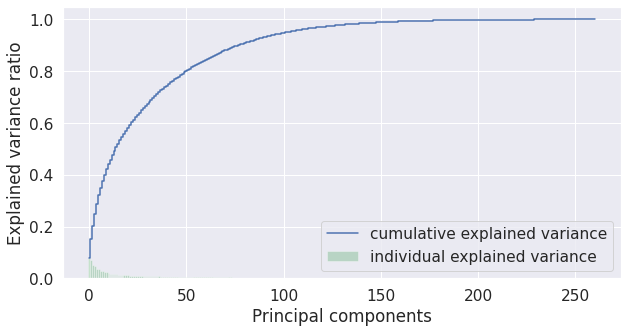

Cumulative explained ratio: [0.07972825 0.15049871 0.20337035 0.24972714 0.28696369 0.3210326
 0.34903279 0.3757607  0.39882188 0.4213059  0.44048346 0.45807079
 0.47508778 0.49146886 0.50643561 0.52074959 0.533986   0.54703218
 0.55858243 0.56990385 0.58108036 0.59170755 0.60223463 0.61207667
 0.62176778 0.63114867 0.6402678  0.64921236 0.65756698 0.66585052
 0.67405199 0.68197675 0.68971104 0.69722834 0.70460824 0.71179118
 0.71877473 0.72557236 0.7321334  0.73854884 0.7447794  0.75082438
 0.75672406 0.76251126 0.76821651 0.77371332 0.77918929 0.78463136
 0.78991229 0.79508482 0.80015303 0.80504595 0.80986482 0.81441971
 0.81891994 0.82335736 0.82769811 0.831926   0.83599919 0.84005003
 0.84403525 0.84798863 0.85186401 0.85565338 0.85935368 0.86301913
 0.86662482 0.8701218  0.87358797 0.87697968 0.88024571 0.88345613
 0.88660778 0.88972086 0.8926721  0.89555801 0.89834909 0.90111797
 0.90376827 0.90641184 0.9089981  0.91148627 0.91388029 0.91623675
 0.91857723 0.92084692 0.9230126  0

In [ ]:
cum_var_ratio = np.cumsum(var_ratio)

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_ratio)), 
        var_ratio, 
        alpha=0.3333, 
        align='center', 
        label='individual explained variance', 
        color = 'g')
plt.step(range(len(cum_var_ratio)),
         cum_var_ratio, 
         where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

print("Cumulative explained ratio:",cum_var_ratio)

yang mendekati 0.9 ada di poin 78

In [ ]:
pca = PCA(n_components=78, random_state=2022)
pca.fit(X_norm)
norm_pca_array = pca.transform(X_norm)
norm_pca = pd.DataFrame(data=norm_pca_array, columns = 
                        [
                         'PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
                         'PC11', 'PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
                         'PC21', 'PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30',
                         'PC31', 'PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40',
                         'PC41', 'PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50',
                         'PC51', 'PC52','PC53','PC54','PC55','PC56','PC57','PC58','PC59','PC60',
                         'PC61', 'PC62','PC63','PC64','PC65','PC66','PC67','PC68','PC69','PC70',
                         'PC71', 'PC72','PC73','PC74','PC75','PC76','PC77','PC78'
                        ])


In [ ]:
X_train_norm_pca, X_test_norm_pca, Y_train_norm_pca, Y_test_norm_pca = train_test_split(norm_pca,y, test_size=0.3, random_state=2022)

# Tahapan 8: Membangun Model

- disini saya memakai Decision Tree
- metriks yang dicari menggunakan akurasi, presisi dan recall
- membandingkan antara data original dengan data PCA

### siapkan parameter untuk decision tree

In [ ]:
xxx = np.arange(1,21)
xxx

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [ ]:
parameters_dt = {
                "model__max_depth": np.arange(1,21),
                "model__min_samples_leaf": np.arange(1,101,2),
                "model__min_samples_split": np.arange(2,11),
                "model__criterion": ['gini','entropy'],
                "model__random_state": [2022]
}

### lakukan pemodelan decision tree dengan parameter yang optimal

In [ ]:
classifier_dt_pipeline = Pipeline([
                          ('model',DecisionTreeClassifier())                                            
                          ])

### pemodelan dengan data original

In [ ]:
ori_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=2, n_jobs=-1)

In [ ]:
ori_classifier_dt.fit(X_train,Y_train.ravel())

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [2022]})

In [ ]:
ori_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=4, min_samples_split=10,
                                        random_state=2022))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,ori_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 4
model__min_samples_leaf: 1
model__min_samples_split: 10
model__random_state: 2022


### pemodelan dengan data normal

In [ ]:
norm_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=2, n_jobs=-1)

In [ ]:
norm_classifier_dt.fit(X_train_norm,Y_train_norm.ravel())

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [2022]})

In [ ]:
norm_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=6, min_samples_split=6,
                                        random_state=2022))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,norm_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 6
model__min_samples_leaf: 1
model__min_samples_split: 6
model__random_state: 2022


### (new) pemodelan dengan data original PCA

In [ ]:
ori_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=2, n_jobs=-1)

In [ ]:
ori_pca_classifier_dt.fit(X_train_pca,Y_train_pca.ravel())

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [2022]})

In [ ]:
ori_pca_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=4, random_state=2022))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,ori_pca_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 4
model__min_samples_leaf: 1
model__min_samples_split: 2
model__random_state: 2022


### (new) pemodelan dengan data normal PCA

In [ ]:
norm_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=2, n_jobs=-1)

In [ ]:
norm_pca_classifier_dt.fit(X_train_norm_pca,Y_train_norm_pca.ravel())

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [2022]})

In [ ]:
norm_pca_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                        min_samples_leaf=5,
                                        random_state=2022))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,norm_pca_classifier_dt.best_params_[param_name]))

model__criterion: 'entropy'
model__max_depth: 4
model__min_samples_leaf: 5
model__min_samples_split: 2
model__random_state: 2022


# Tahapan 10: Mengevaluasi Hasil Pemodelan

## evaluasi dengan data original

In [ ]:
ori_y_pred_dt_train = ori_classifier_dt.predict(X_train)

ori_accuracy_dt_train = accuracy_score(Y_train,ori_y_pred_dt_train)
print('Akurasi pada training set: ', ori_accuracy_dt_train)

ori_precision_dt_train = precision_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_precision_dt_train)

ori_recall_dt_train = recall_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_recall_dt_train)

ori_y_pred_dt_test = ori_classifier_dt.predict(X_test)

ori_accuracy_dt_test = accuracy_score(Y_test,ori_y_pred_dt_test)
print('Akurasi pada test set: ', ori_accuracy_dt_test)

ori_precision_dt_test = precision_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_precision_dt_test)

ori_recall_dt_test = recall_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_recall_dt_test)

Akurasi pada training set:  0.7728531855955678
Precision pada training set:  0.7728531855955678
Recall pada training set:  0.7728531855955678
Akurasi pada test set:  0.6593406593406593
Precision pada test set:  0.6593406593406593
Recall pada test set:  0.6593406593406593


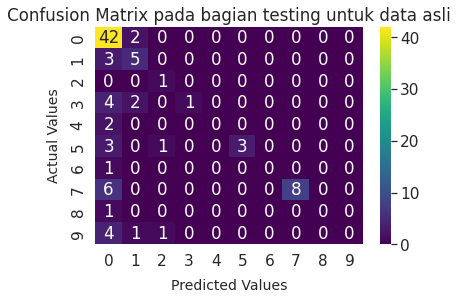

In [ ]:
sns.heatmap(confusion_matrix(Y_test,ori_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

## evaluasi dengan data normal

In [ ]:
norm_y_pred_dt_train = norm_classifier_dt.predict(X_train_norm)

norm_accuracy_dt_train = accuracy_score(Y_train_norm,norm_y_pred_dt_train)
print('Akurasi pada training set: ', norm_accuracy_dt_train)

norm_precision_dt_train = precision_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_precision_dt_train)

norm_recall_dt_train = recall_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_recall_dt_train)

norm_y_pred_dt_test = norm_classifier_dt.predict(X_test_norm)

norm_accuracy_dt_test = accuracy_score(Y_test_norm,norm_y_pred_dt_test)
print('Akurasi pada test set: ', norm_accuracy_dt_test)

norm_precision_dt_test = precision_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_precision_dt_test)

norm_recall_dt_test = recall_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_recall_dt_test)

Akurasi pada training set:  0.8481012658227848
Precision pada training set:  0.8481012658227848
Recall pada training set:  0.8481012658227848
Akurasi pada test set:  0.7132352941176471
Precision pada test set:  0.7132352941176471
Recall pada test set:  0.7132352941176471


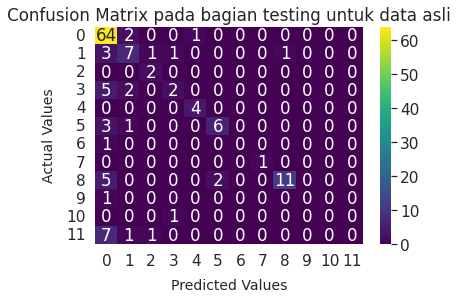

In [ ]:
sns.heatmap(confusion_matrix(Y_test_norm,norm_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

## (new) evaluasi dengan data original PCA

In [ ]:
ori_pca_y_pred_dt_train = ori_pca_classifier_dt.predict(X_train_pca)

ori_pca_accuracy_dt_train = accuracy_score(Y_train_pca,ori_pca_y_pred_dt_train)
print('Akurasi pada training set: ', ori_pca_accuracy_dt_train)

ori_pca_precision_dt_train = precision_score(Y_train_pca,ori_pca_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_pca_precision_dt_train)

ori_pca_recall_dt_train = recall_score(Y_train_pca,ori_pca_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_pca_recall_dt_train)

ori_pca_y_pred_dt_test = ori_pca_classifier_dt.predict(X_test_pca)

ori_pca_accuracy_dt_test = accuracy_score(Y_test_pca,ori_pca_y_pred_dt_test)
print('Akurasi pada test set: ', ori_pca_accuracy_dt_test)

ori_pca_precision_dt_test = precision_score(Y_test_pca,ori_pca_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_pca_precision_dt_test)

ori_pca_recall_dt_test = recall_score(Y_test_pca,ori_pca_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_pca_recall_dt_test)

Akurasi pada training set:  0.7120253164556962
Precision pada training set:  0.7120253164556962
Recall pada training set:  0.7120253164556962
Akurasi pada test set:  0.5661764705882353
Precision pada test set:  0.5661764705882353
Recall pada test set:  0.5661764705882353


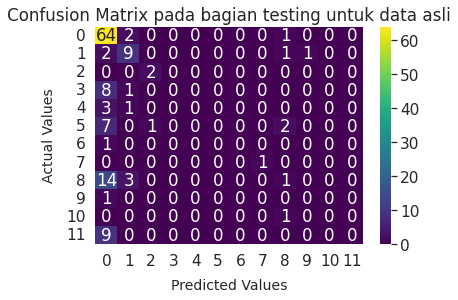

In [ ]:
sns.heatmap(confusion_matrix(Y_test_pca,ori_pca_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

## (new) evaluasi dengan data normal PCA

In [ ]:
norm_pca_y_pred_dt_train = norm_pca_classifier_dt.predict(X_train_norm_pca)

norm_pca_accuracy_dt_train = accuracy_score(Y_train_norm_pca,norm_pca_y_pred_dt_train)
print('Akurasi pada training set: ', norm_pca_accuracy_dt_train)

norm_pca_precision_dt_train = precision_score(Y_train_norm_pca,norm_pca_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_pca_precision_dt_train)

norm_pca_recall_dt_train = recall_score(Y_train_norm_pca,norm_pca_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_pca_recall_dt_train)

norm_pca_y_pred_dt_test = norm_pca_classifier_dt.predict(X_test_norm_pca)

norm_pca_accuracy_dt_test = accuracy_score(Y_test_norm_pca,norm_pca_y_pred_dt_test)
print('Akurasi pada test set: ', norm_pca_accuracy_dt_test)

norm_pca_precision_dt_test = precision_score(Y_test_norm_pca,norm_pca_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_pca_precision_dt_test)

norm_pca_recall_dt_test = recall_score(Y_test_norm_pca,norm_pca_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_pca_recall_dt_test)

Akurasi pada training set:  0.7056962025316456
Precision pada training set:  0.7056962025316456
Recall pada training set:  0.7056962025316456
Akurasi pada test set:  0.5735294117647058
Precision pada test set:  0.5735294117647058
Recall pada test set:  0.5735294117647058


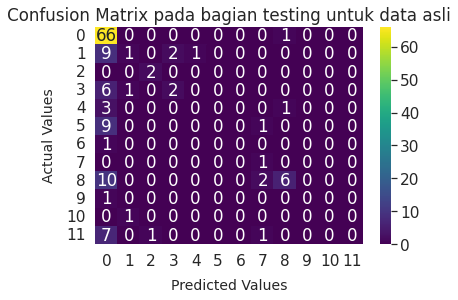

In [ ]:
sns.heatmap(confusion_matrix(Y_test_pca,norm_pca_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

# Tahapan 11: melakukan proses review

In [ ]:
models = [
          ('Decision Tree Data Original', ori_accuracy_dt_train, ori_accuracy_dt_test),
          ('Decision Tree Data Normalisasi', norm_accuracy_dt_train, norm_accuracy_dt_test),
          ('Decision Tree PCA Data Original', ori_pca_accuracy_dt_train, ori_pca_accuracy_dt_test),    
          ('Decision Tree PCA Data Normalisasi', norm_pca_accuracy_dt_train, norm_pca_accuracy_dt_test),      
         ]

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Decision Tree Data Original,0.772853,0.659341
1,Decision Tree Data Normalisasi,0.848101,0.713235
2,Decision Tree PCA Data Original,0.712025,0.566176
3,Decision Tree PCA Data Normalisasi,0.705696,0.573529


In [ ]:
models_comparison = [
                        ('Decision Tree Data Original', ori_accuracy_dt_test, ori_recall_dt_test, ori_precision_dt_test), 
                        ('Decision Tree Data Normalisasi', norm_accuracy_dt_test, norm_recall_dt_test, norm_precision_dt_test),
                        ('Decision Tree Data Original', ori_pca_accuracy_dt_test, ori_pca_recall_dt_test, ori_pca_precision_dt_test),
                        ('Decision Tree PCA Data Normalisasi', norm_pca_accuracy_dt_test, norm_pca_recall_dt_test, norm_pca_precision_dt_test),                  
                    ]

In [ ]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Decision Tree Data Original,0.659341,0.659341,0.659341
1,Decision Tree Data Normalisasi,0.713235,0.713235,0.713235
2,Decision Tree Data Original,0.566176,0.566176,0.566176
3,Decision Tree PCA Data Normalisasi,0.573529,0.573529,0.573529


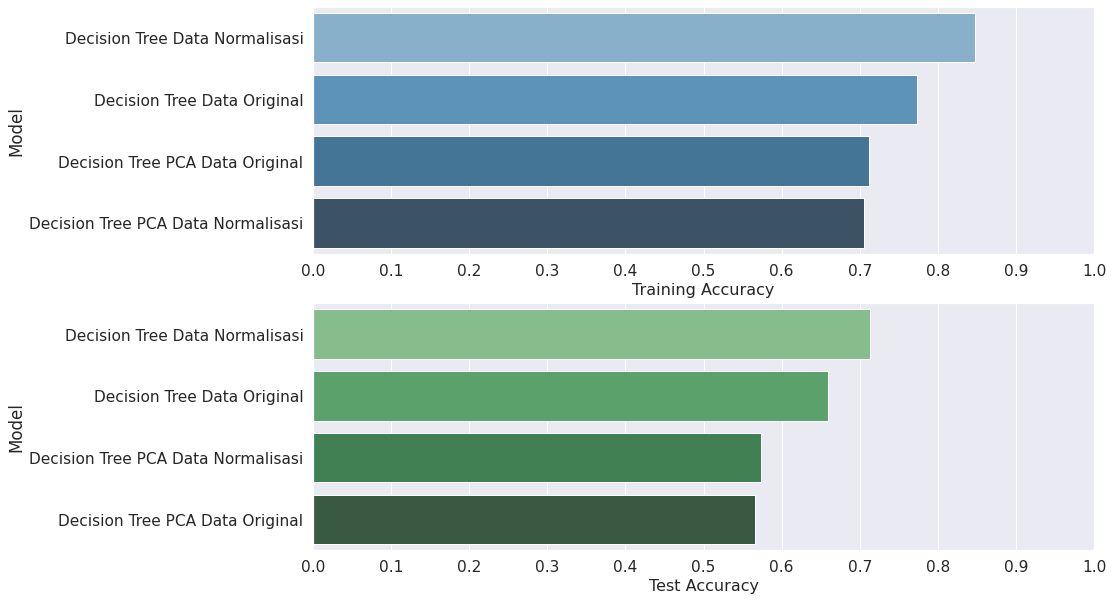

In [ ]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

**Kesimpulan**:
- silakan isi